### 붓꽃 데이터 셋에 LDA 적용하기 


1.   StandardScaled적용
2.   LDA적용



#### 데이터셋 로드 및 정규화 적용

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def scaled_standard():
  """
  붓꽃 데이터를 로드하여 정규화시킨후 해당 데이터를 반환
  """
  iris = load_iris()
  iris_scaled = StandardScaler().fit_transform(iris.data)
  display(type(iris_scaled), iris_scaled[1,: ])
  return iris_scaled, iris

# 수행
iris_scaled, iris = scaled_standard()

numpy.ndarray

array([-1.14301691, -0.13197948, -1.34022653, -1.3154443 ])

#### 차원 축소 방법 적용
* LDA(Linear Discriminat Analysis)
* PCA(Principle Component Analysis)

In [42]:
def apply_dimension_reduc(scaledData=None, opt='LDA'):
  """
  정규화된 데이터를 차원축소방법에 따라 LDA혹은 PCA적용
  """
  iris_dimreduce = None
  if opt=="LDA":
    lda = LinearDiscriminantAnalysis(n_components=2)
    # fit()호출 시 target값 입력 
    lda.fit(iris_scaled, iris.target)
    iris_dimreduce = lda.transform(iris_scaled)
    #display(iris_lda[1,:], type(iris_lda))
    display(iris_dimreduce.shape)
  else:
    pca = PCA(n_components=2)
    pca.fit(iris_scaled, iris.target)
    iris_dimreduce = pca.transform(iris_scaled)
    display(iris_dimreduce.shape)
  return iris_dimreduce

#### LDA와 PCA의 분포도 시각화 비교

In [49]:
def plot_dim_reduction(df, cols:list):
  """
  정규화 스케일링을 하고 차원축소방법(LDA, PCA)를 적용한 데이터프레임을 입력받아
  인자로 받은 컬럼정보를 바탕으로 pyplot을 이용한 시각화를 통한 비교
  """
  #setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
  markers=['^', 's', 'o']

  #setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
  for i, marker in enumerate(markers):
      x_axis_data = df[df['target']==i][cols[0]]
      y_axis_data = df[df['target']==i][cols[1]]

      plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

  plt.legend(loc='upper right')
  plt.xlabel(cols[0])
  plt.ylabel(cols[1])
  plt.show()

def proc_dim_redction(scaled_data, opt='LDA'):
  """
  정규화스케일링 된 데이터에서 차원축소하고자 하는 방법에 따라
  차원축소
  리턴값 : 데이터프레임, 압축한 컬럼정보
  """
  cols = None
  df = pd.DataFrame()
  if opt =="LDA":
    cols = ['lda_component_1','lda_component_2']
    df = pd.DataFrame(apply_dimension_reduc(iris_scaled), columns=cols)
    df['target'] = iris.target
  else:
    cols = ['pca_component_1','pca_component_2']
    df = pd.DataFrame(apply_dimension_reduc(iris_scaled, opt='PCA'), columns=cols)
    df['target'] = iris.target
  return df, cols

def main(iris_scaled, opt):
  """
  1.iris_scaled - 정규화된 데이터
  2.opt - 차원축소 방법
  """
  df, cols = proc_dim_redction(iris_scaled, opt)
  plot_dim_reduction(df, cols)

(150, 2)

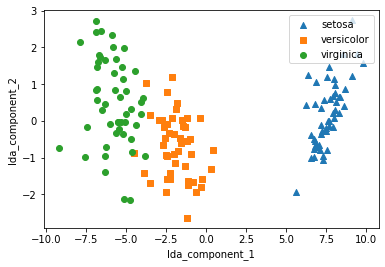

In [50]:
# LDA방법 적용 후 시각화
main(iris_scaled, opt='LDA')

(150, 2)

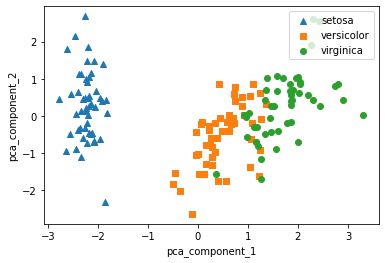

In [51]:
# PCA방법 적용 후 시각화
main(iris_scaled, 'PCA')

#### 정리
* LDA는 그래프에서 보듯이 상당히 잘 분류가 되어있음을 알수 있다.(클러스터링과 유사)
* LDA는 비지도학습과는 달리 ,타겟값이 인자로 들어감을 유의